## Assignment-03 First Step of Machine Learning: Model and Evaluation¶


### Part-1 Programming Review 编程回顾¶


#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)¶


In [178]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

In [179]:
X = np.random.random((20,1))

In [180]:
print(X)

[[0.72330597]
 [0.19831127]
 [0.45191137]
 [0.78810732]
 [0.9344699 ]
 [0.38851624]
 [0.75486978]
 [0.65488088]
 [0.43874249]
 [0.0717743 ]
 [0.96779667]
 [0.97912142]
 [0.94987724]
 [0.86264278]
 [0.39054584]
 [0.86449106]
 [0.01806532]
 [0.8163371 ]
 [0.29317692]
 [0.8788524 ]]


In [181]:
def line_function(x):
    return 5.2*x+13.14+random.randint(-1,1)

In [182]:
y = [line_function(x) for x in X]

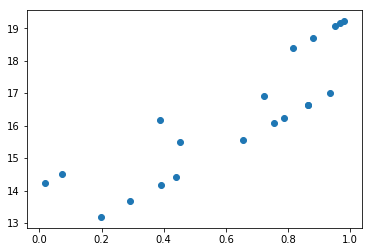

In [183]:
plt.scatter(X,y)

In [184]:
lr = LinearRegression().fit(X,y)

In [185]:
k = lr.coef_
print(k)
b = lr.intercept_
print(b)

[[5.27152656]]
[12.99556128]


In [186]:
def f(x):
    return k*x+b

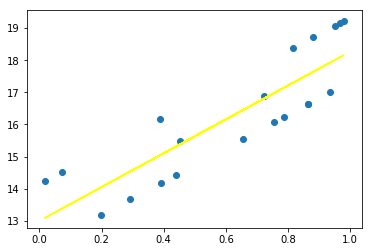

In [187]:
plt.scatter(X,y)
plt.plot(X,f(X),color='yellow')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [188]:
from collections import Counter
from scipy.spatial.distance import cosine


In [189]:
def X_y_model(trainX,trainY):
    return[(Xi,yi) for Xi,yi in zip(trainX,trainY)]

In [190]:
def distance(x1,x2):
    return abs(x1-x2)

In [191]:
def knn_predict(testx,trainX,trainY,count):
    result = sorted(X_y_model(trainX,trainY),key=lambda x1:distance(x1[0],testx))[:count]
    y_list = [x_y[1][0] for x_y in result ]
    best_result = Counter(y_list).most_common(count)
    print(best_result)
    return best_result[0][0]

In [192]:
knn_predict(0.3,X,y,10)

[(13.664519990755952, 1), (16.160284457480547, 1), (14.1708383931852, 1), (13.171218612264079, 1), (14.421460934335993, 1), (15.489939127467292, 1), (14.513226371859387, 1), (14.233939670876229, 1), (15.545380601633394, 1), (16.90119101941667, 1)]


13.664519990755952

In [193]:
f(0.3)

array([[14.57701924]])

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)¶


In [194]:
import pandas as pd

In [207]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

In [210]:
data = {
    'gender':['F','F','F','M','M','M','M','M','F','M'],
    'fair_color':['black','red','blue','yellow','blue','red','blue','red','yellow','yellow'],
    'fighting_capacity':[50000,80000,1000,10000,100000,2000,2000,100000,100000,1000],
    'super_saiyan':[0,0,0,1,1,0,0,1,0,0]
}

In [211]:
dataset = pd.DataFrame.from_dict(data)

In [212]:
dataset

,gender,fair_color,fighting_capacity,super_saiyan
0,F,black,50000,0
1,F,red,80000,0
2,F,blue,1000,0
3,M,yellow,10000,1
4,M,blue,100000,1
5,M,red,2000,0
6,M,blue,2000,0
7,M,red,100000,1
8,F,yellow,100000,0
9,M,yellow,1000,0


In [213]:
set(data['fair_color'])

{'black', 'blue', 'red', 'yellow'}

In [214]:
sub_split_1 = dataset[dataset['gender']=='F']['super_saiyan'].tolist()
sub_split_1


[0, 0, 0, 0]

In [219]:
def find_min_feature_spilter(train_data:pd.DataFrame,target:str) ->str:
    features = set(train_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    for f in features:
        values = set(train_data[f])
        for v in values:
            sub_spliter1 = train_data[train_data[f]==v][target].tolist()
            entropy1 = entropy(sub_spliter1)
            
            sub_spliter2 = train_data[train_data[f]!=v][target].tolist()
            entropy2 = entropy(sub_spliter2)
            
            entropy_v = entropy1 + entropy2
            
            if entropy_v<=min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
    print(spliter)
    return spliter
            

In [220]:
find_min_feature_spilter(dataset,'super_saiyan')

('fighting_capacity', 100000)


('fighting_capacity', 100000)

In [223]:
dataset[dataset['fighting_capacity']==100000]

,gender,fair_color,fighting_capacity,super_saiyan
4,M,blue,100000,1
7,M,red,100000,1
8,F,yellow,100000,0


In [224]:
find_min_feature_spilter(dataset[dataset['fighting_capacity']==100000],'super_saiyan')

('gender', 'F')


('gender', 'F')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

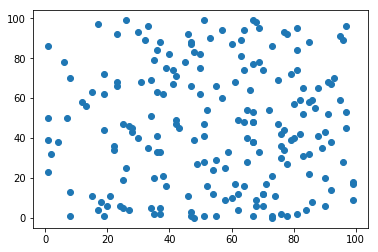

In [232]:
from sklearn.cluster import KMeans
from collections import defaultdict

X = [random.randint(0,100) for _ in range(200)]
Y = [random.randint(0,100) for _ in range(200)]
plt.scatter(X,Y)

In [233]:
train_data = [[x,y] for x,y in zip(X,Y)]

In [236]:
def kmeans_model(train_data,clusters,color,max_iter):
    model = KMeans(n_clusters=clusters,max_iter=max_iter)
    model.fit(train_data)
    
    centers = defaultdict(list)
    for label,location in zip(model.labels_,train_data):
        centers[label].append(location)
    
    for i,c in enumerate(centers):
        for location in centers[c]:
            plt.scatter(*location,c=color[i])
    for center in model.cluster_centers_:
        plt.scatter(*center,s=100)

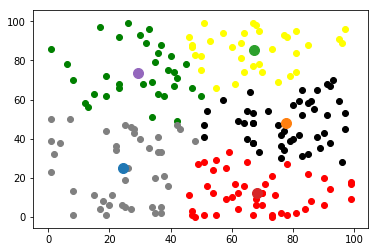

In [237]:
kmeans_model(train_data,5,color=['red', 'green', 'grey', 'black', 'yellow'],max_iter=50)

### Part-2 Question and Answer 问答

#### 1. What's the model? why all the models are wrong, but some are useful? (5 points)

模型是指对于某个实际问题或客观事物、规律进行抽象后的一种形式化表达方式
模型是错误的，模型只是对现实复杂问题的简化或理想化，
有用是指，对于现实复杂问题简化很有用，方便于理解和计算

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

过拟合
模型过度拟合，在训练集上表现好，但是在测试集上效果差，也就是说在已知的数据集合中非常好，但是在添加一些新的数据进来训练效果就会差很多，造成这样的原因是考虑影响因素太多，超出自变量的维度过于多了
欠拟合（高偏差）
模型拟合不够，在训练集上表现效果差，没有充分的利用数据，预测的准确度低。

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

真阳性（TP）：诊断为有，实际上也有病。
伪阳性（FP）：诊断为有，实际却没有病。
真阴性（TN）：诊断为没有，实际上也没有病。
伪阴性（FN）：诊断为没有，实际却有病。

精确率(precision)的定义为$$P=\frac {TP} {TP+FP}$$
它表示的是预测为正的样本中有多少是真正的正样本

召回率(recall)的定义为$$P=\frac {TP} {TP+FN}$$
它表示的是样本中的正例有多少被预测正确了

P和R指标有时候会出现的矛盾的情况，这样就需要综合考虑他们
$Fscore=\frac{(a^2+1)*P*R} {a^2(P+R)}$
当a=1时就是F1score
$$F1=\frac {2PR} {P+R}$$
当a=2时
$$F2=\frac {5PR} {4*(P+R)}$$

AUC评价模型识别标准的一个值，曲线包裹的面积


#### 4. Based on our course and yourself mind, what's the machine learning? (8')

In [ ]:
机器学习可以通过训练，具有识别、筛选、预测能力。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

正确，正确定义了机器学习的评价标准就可以通过评价一个模型对于结果预测的准确度，进而更加接近于真实值

### Part-03 Programming Practice 编程练习

1

2

### $$ \frac{\partial{loss}}{\partial{k}} = 
\begin{cases}
-\frac{1}{n}\sum(x_i)     &y_i > {\hat{y_i } }\\
\frac{1}{n}\sum(x_i)      &y_i < {\hat{y_i } }\\
\end{cases}$$

### $$ \frac{\partial{loss}}{\partial{b}} = 
\begin{cases}
-\frac{1}{n}\sum(1)     &y_i > {\hat{y_i } }\\
-\frac{1}{n}\sum(-1)      &y_i < {\hat{y_i } }\\
\end{cases}$$

In [255]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

datasets = load_boston()
x,y = datasets['data'],datasets['target']
x_dis = x[:,7]

def price(dis,k,b):
    return k * dis + b
def loss(y,y_hat):
    return sum((abs(y_i-y_hat_i)) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [256]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if(y_i>y_hat_i):
            gradient += -x_i
        else:
            gradient += x_i
    return 1/n * gradient

def partial_derivative_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if(y_i>y_hat_i):
            gradient += -1
        else:
            gradient += 1
    return 1/n * gradient

In [257]:
k = random.random()*100 - 50
b = random.random()*100 - 50
learning_rate = 1e-1
iteration_num =300
losses = []
for i in range(iteration_num):
    price_current_use_params = [price(r, k, b) for r in x_dis]
    current_loss = loss(y,price_current_use_params)
    losses.append(current_loss)
    k_gradient = partial_derivative_k(x_dis,y,price_current_use_params)
    b_gradient = partial_derivative_b(x_dis,y,price_current_use_params)
    k = k+(-1*k_gradient)*learning_rate
    b = b+(-1*b_gradient)*learning_rate
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
best_k = k
best_b = b

Iteration 0, the loss is 67.99472865528013, parameters k is 30.349183052368257 and b is -27.555848500165943
Iteration 1, the loss is 66.60116972924318, parameters k is 29.987455779640985 and b is -27.644781306490053
Iteration 2, the loss is 65.22086503252487, parameters k is 29.628174119561933 and b is -27.73213308514618
Iteration 3, the loss is 63.855265382383955, parameters k is 29.27012613537221 and b is -27.818694349968315
Iteration 4, the loss is 62.50612742087183, parameters k is 28.916200364621222 and b is -27.902488816371477
Iteration 5, the loss is 61.18879307268704, parameters k is 28.56502637252636 and b is -27.984702255106654
Iteration 6, the loss is 59.89157554200784, parameters k is 28.21524657015482 and b is -28.06612518000784
Iteration 7, the loss is 58.607175018337024, parameters k is 27.867584080036245 and b is -28.146362334158038
Iteration 8, the loss is 57.334710149187465, parameters k is 27.520549811261542 and b is -28.22620423139124
Iteration 9, the loss is 56.069

Iteration 197, the loss is 19.437519527122717, parameters k is 10.6238579930797 and b is -25.157034270916938
Iteration 198, the loss is 19.421355386271383, parameters k is 10.61647660968049 and b is -25.117508579217333
Iteration 199, the loss is 19.405203304753364, parameters k is 10.60722917885045 and b is -25.078378144434723
Iteration 200, the loss is 19.389038571682157, parameters k is 10.59984779545124 and b is -25.038852452735117
Iteration 201, the loss is 19.372887082383993, parameters k is 10.5906003646212 and b is -24.999722017952507
Iteration 202, the loss is 19.35672175709295, parameters k is 10.58321898122199 and b is -24.960196326252902
Iteration 203, the loss is 19.34057086001465, parameters k is 10.57397155039195 and b is -24.921065891470292
Iteration 204, the loss is 19.324404942503744, parameters k is 10.56659016699274 and b is -24.881540199770686
Iteration 205, the loss is 19.308254637645284, parameters k is 10.557342736162699 and b is -24.842409764988076
Iteration 206

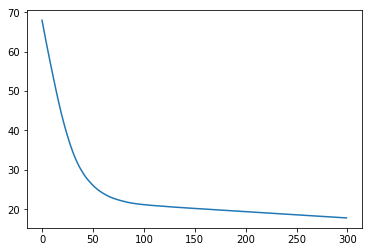

In [258]:
plt.plot(list(range(iteration_num)),losses)

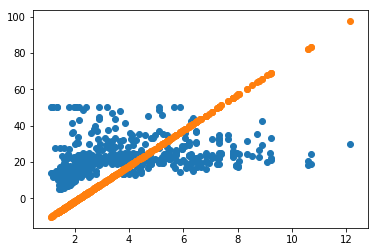

In [259]:
price_use_best_parameters = [price(r, best_k, best_b) for r in x_dis]
plt.scatter(x_dis,y)
plt.scatter(x_dis,price_current_use_params)